
### Collecting information on the CLI

To see the header of the file that is of our interest, we can use the `head` command.
1. `glob` python module to find files in the file system
2. `%%bash` run bash commands directly in jupyter notebook cells
3. `subprocess` module allows us to execute shell commands and to read what the process was writing to standard out and standard error


In [1]:
import numpy as np
import pandas as pd

Additionally, you can make use of the `glob` module to glob for certain file patterns. We will store the filename of the CSV file we are interested in, in a variable called `local_file`.

In [16]:
!ls ./data/*API_EN*.csv

./data/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_887574.csv
./data/Metadata_Country_API_EN.ATM.CO2E.KT_DS2_en_csv_v2_887574.csv
./data/Metadata_Indicator_API_EN.ATM.CO2E.KT_DS2_en_csv_v2_887574.csv


In [3]:
from glob import glob
# glob is useful in any situation where your program needs to look for a list of files on the filesystem with names matching a pattern. If you need a list of filenames that all have a certain extension, prefix, or any common string in the middle, use glob instead of writing code to scan the directory contents yourself.

local_files = glob('./data/*API_EN*.csv')
local_file = local_files[1]
print(local_file)

./data/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_887574.csv


In [4]:
%%bash
head ./data/*API_EN.ATM.CO2*.csv

==> ./data/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_1345584.csv <==
﻿"Data Source","World Development Indicators",

"Last Updated Date","2020-09-08",

"Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019",
"Aruba","ABW","CO2 emissions (kt)","EN.ATM.CO2E.KT","11092.675","11576.719","12713.489","12178.107","11840.743","10623.299","9933.903","12236.779","11378.701","14891.687","16655.514","14495.651","14055.611","15592.084","14132.618","10234.597","21862.654","11419.038","9724.884","10201.594","10498.621","9999.909","11180.683","5746.189","14348.971","16794.86","179.683","44

We can see that the actual CSV header is on line five. To extract only the header row, we can use the stream editor *sed*, see `man sed`. The argument `'5!d'` tells `sed`, that we are only interested in the fifth line.

In [5]:
%%bash
# sed is a cli application that can filter text from pipeline (inputstream or a file)
# Sed Linux command doesn’t update your data. It only sends the changed text to STDOUT
# To know more about the sed tool: https://www.geeksforgeeks.org/sed-command-in-linux-unix-with-examples/
sed '5!d' data/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_887574.csv # sed delete all lines except line 5 (sed '5d' filename.ext (would delete only line 5))

"Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019",


To get the two lines -one for Denmark and one for Uruguay repectively- holding the CO2 emission in tons, we can use the grep command, see `man grep`.

In [6]:
%%bash
grep -E "DNK|URY" data/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_887574.csv

"Denmark","DNK","CO2 emissions (kt)","EN.ATM.CO2E.KT","29779.707","31734.218","36926.69","40707.367","43189.926","44337.697","50127.89","49075.461","53325.514","59401.733","62100.645","57062.187","59643.755","59266.054","55078.34","55778.737","60135.133","61847.622","61117.889","62999.06","60369.821","51789.041","53695.881","50175.561","50861.29","60072.794","58903.021","58341.97","55107.676","48785.768","50230.566","60270.812","54322.938","57065.854","61000.545","57172.197","72181.228","61557.929","59552.08","55148.013","51330.666","52918.477","52049.398","55998.757","50600.933","47095.281","54986.665","50256.235","46933.933","44510.046","46640.573","40645.028","36427.978","38532.836","33498.045","","","","","",
"Uruguay","URY","CO2 emissions (kt)","EN.ATM.CO2E.KT","4319.726","4121.708","4011.698","4319.726","4558.081","5522.502","5405.158","4884.444","4884.444","5595.842","5742.522","5808.528","6076.219","5775.525","5683.85","5969.876","5896.536","5650.847","5742.522","6277.904","583

### Executing OS Commands from Python


With the help of the `subprocess` module allows us to execute shell commands and to read what the process was writing to standard out and standard error.

https://docs.python.org/3/library/subprocess.html

In [7]:
import subprocess


cmd = 'sed 5!d {}'.format(local_file).split()

out, err = subprocess.Popen(cmd, stdout=subprocess.PIPE, 
                            stderr=subprocess.STDOUT).communicate()
# Since we are getting the output as a byte literal, we have to decode it into string
header_cols = out.splitlines()[0].decode('UTF-8').split(',')
header_cols = [h.replace('"', '') for h in header_cols]
header_cols

['Country Name',
 'Country Code',
 'Indicator Name',
 'Indicator Code',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '']

In [8]:
%%bash
ls -ltr data/*.csv

-rw-r--r-- 1 jovyan  1000   31364 Feb  4 20:28 data/Metadata_Country_API_EN.ATM.CO2E.KT_DS2_en_csv_v2_887574.csv
-rw-r--r-- 1 jovyan  1000   31101 Feb  4 20:28 data/Metadata_Country_API_EN.ATM.CO2E.KT_DS2_en_csv_v2_1345584.csv
-rw-r--r-- 1 jovyan  1000    1555 Feb  4 20:28 data/DKstat_bykoder.csv
-rw-r--r-- 1 jovyan  1000  140513 Feb  4 20:28 data/API_MS.MIL.XPND.CN_DS2_en_csv_v2_898165.csv
-rw-r--r-- 1 jovyan  1000  177911 Feb  4 20:28 data/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_887574.csv
-rw-r--r-- 1 jovyan  1000  184924 Feb  4 20:28 data/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_1345584.csv
-rw-r--r-- 1 jovyan  1000    1648 Feb  4 20:28 data/Metadata_Indicator_API_MS.MIL.XPND.CN_DS2_en_csv_v2_898165.csv
-rw-r--r-- 1 jovyan  1000     466 Feb  4 20:28 data/Metadata_Indicator_API_EN.ATM.CO2E.KT_DS2_en_csv_v2_887574.csv
-rw-r--r-- 1 jovyan  1000     466 Feb  4 20:28 data/Metadata_Indicator_API_EN.ATM.CO2E.KT_DS2_en_csv_v2_1345584.csv
-rw-r--r-- 1 jovyan  1000   31364 Feb  4 20:28 data/Metadata_Countr

In [9]:
%%bash

ls -ltrh data | tail

-rw-r--r-- 1 jovyan  1000  4.8K Feb 23 11:20 befkbh_stat_code.json
-rw-rw-r-- 1 jovyan  1000   13K Mar  2 08:22 population_data.csv
-rw-rw-r-- 1 jovyan  1000   26K Mar  2 13:16 mil_exp.zip
-rw-rw-r-- 1 jovyan  1000   63K Mar  2 13:51 mil_exp.csv
-rw-rw-r-- 1 jovyan  1000  6.1K Mar  2 14:22 population_world.zip
drwxrwxr-x 2 jovyan  1000  4.0K Mar  2 14:25 population_data
-rw-r--r-- 1 jovyan users   76K Mar  3 13:14 API_EN.ATM.CO2E.KT_DS2_en_csv_v2_2056082.zip
-rw-r--r-- 1 jovyan users   466 Mar  3 13:14 Metadata_Indicator_API_EN.ATM.CO2E.KT_DS2_en_csv_v2_2056082.csv
-rw-r--r-- 1 jovyan users   31K Mar  3 13:14 Metadata_Country_API_EN.ATM.CO2E.KT_DS2_en_csv_v2_2056082.csv
-rw-r--r-- 1 jovyan users  182K Mar  3 13:14 API_EN.ATM.CO2E.KT_DS2_en_csv_v2_2056082.csv


Now, let's get in a similar way the line of the CSV file containing the time series corresponding to Danmark's and Uruguay's CO2 emissions.

In [10]:
cmd = ['grep', '-E', 'DNK|URY', local_file]
out, err = subprocess.Popen(cmd, stdout=subprocess.PIPE, 
                            stderr=subprocess.STDOUT).communicate()

In [12]:
print(out)

b'"Denmark","DNK","CO2 emissions (kt)","EN.ATM.CO2E.KT","29779.707","31734.218","36926.69","40707.367","43189.926","44337.697","50127.89","49075.461","53325.514","59401.733","62100.645","57062.187","59643.755","59266.054","55078.34","55778.737","60135.133","61847.622","61117.889","62999.06","60369.821","51789.041","53695.881","50175.561","50861.29","60072.794","58903.021","58341.97","55107.676","48785.768","50230.566","60270.812","54322.938","57065.854","61000.545","57172.197","72181.228","61557.929","59552.08","55148.013","51330.666","52918.477","52049.398","55998.757","50600.933","47095.281","54986.665","50256.235","46933.933","44510.046","46640.573","40645.028","36427.978","38532.836","33498.045","","","","","",\r\n"Uruguay","URY","CO2 emissions (kt)","EN.ATM.CO2E.KT","4319.726","4121.708","4011.698","4319.726","4558.081","5522.502","5405.158","4884.444","4884.444","5595.842","5742.522","5808.528","6076.219","5775.525","5683.85","5969.876","5896.536","5650.847","5742.522","6277.904"

In [11]:
lines = out.decode('UTF-8').splitlines()
print(lines)
lines = [l.split(',') for l in lines]
lines = [[c.replace('"', '') for c in l] for l in lines]
lines

['"Denmark","DNK","CO2 emissions (kt)","EN.ATM.CO2E.KT","29779.707","31734.218","36926.69","40707.367","43189.926","44337.697","50127.89","49075.461","53325.514","59401.733","62100.645","57062.187","59643.755","59266.054","55078.34","55778.737","60135.133","61847.622","61117.889","62999.06","60369.821","51789.041","53695.881","50175.561","50861.29","60072.794","58903.021","58341.97","55107.676","48785.768","50230.566","60270.812","54322.938","57065.854","61000.545","57172.197","72181.228","61557.929","59552.08","55148.013","51330.666","52918.477","52049.398","55998.757","50600.933","47095.281","54986.665","50256.235","46933.933","44510.046","46640.573","40645.028","36427.978","38532.836","33498.045","","","","","",', '"Uruguay","URY","CO2 emissions (kt)","EN.ATM.CO2E.KT","4319.726","4121.708","4011.698","4319.726","4558.081","5522.502","5405.158","4884.444","4884.444","5595.842","5742.522","5808.528","6076.219","5775.525","5683.85","5969.876","5896.536","5650.847","5742.522","6277.904"

[['Denmark',
  'DNK',
  'CO2 emissions (kt)',
  'EN.ATM.CO2E.KT',
  '29779.707',
  '31734.218',
  '36926.69',
  '40707.367',
  '43189.926',
  '44337.697',
  '50127.89',
  '49075.461',
  '53325.514',
  '59401.733',
  '62100.645',
  '57062.187',
  '59643.755',
  '59266.054',
  '55078.34',
  '55778.737',
  '60135.133',
  '61847.622',
  '61117.889',
  '62999.06',
  '60369.821',
  '51789.041',
  '53695.881',
  '50175.561',
  '50861.29',
  '60072.794',
  '58903.021',
  '58341.97',
  '55107.676',
  '48785.768',
  '50230.566',
  '60270.812',
  '54322.938',
  '57065.854',
  '61000.545',
  '57172.197',
  '72181.228',
  '61557.929',
  '59552.08',
  '55148.013',
  '51330.666',
  '52918.477',
  '52049.398',
  '55998.757',
  '50600.933',
  '47095.281',
  '54986.665',
  '50256.235',
  '46933.933',
  '44510.046',
  '46640.573',
  '40645.028',
  '36427.978',
  '38532.836',
  '33498.045',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['Uruguay',
  'URY',
  'CO2 emissions (kt)',
  'EN.ATM.CO2E.KT',
  '4319.726',

We are now ready to go to create two time series of CO2 emissions for Danmark and Uruguay repectively.
We are going to use Pandas `Series`, since they are one-dimensional labeled arrays, and thus we can create one for Denmark and Uruquay respectively.

In [12]:
print('header_cols:\n',header_cols)
print('lines:\n',lines)

header_cols:
 ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '']
lines:
 [['Denmark', 'DNK', 'CO2 emissions (kt)', 'EN.ATM.CO2E.KT', '29779.707', '31734.218', '36926.69', '40707.367', '43189.926', '44337.697', '50127.89', '49075.461', '53325.514', '59401.733', '62100.645', '57062.187', '59643.755', '59266.054', '55078.34', '55778.737', '60135.133', '61847.622', '61117.889', '62999.06', '60369.821', '51789.041', '53695.881', '50175.561', '50861.29', '60072.794', '58903.021', '58341.97', '55107.

Since our data and the corresponding indexes are still all strings we have to convert them to floats and integers repectively. We do so using two different mechanisms. Once, creation of typed NumPy arrays and on the other hand via a Pandas method `convert_objects`, which converts strings to numerical values of a suitable type.

In [13]:
# reference to check graph: https://www.klimadebat.dk/grafer_co2udledning.php
years = header_cols[4:-1]
print(years,'\n\n')
danish_emissions = lines[0][4:-1]
print(danish_emissions)
ts_dk = pd.Series(danish_emissions, index=np.asarray(years, dtype=int))
ts_dk = pd.to_numeric(ts_dk)
ts_dk.loc[1960]
print('\Danish CO2 Emissions:\n',ts_dk)

['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'] 


['29779.707', '31734.218', '36926.69', '40707.367', '43189.926', '44337.697', '50127.89', '49075.461', '53325.514', '59401.733', '62100.645', '57062.187', '59643.755', '59266.054', '55078.34', '55778.737', '60135.133', '61847.622', '61117.889', '62999.06', '60369.821', '51789.041', '53695.881', '50175.561', '50861.29', '60072.794', '58903.021', '58341.97', '55107.676', '48785.768', '50230.566', '60270.812', '54322.938', '57065.854', '61000.545', '57172.197', '72181.228', '61557.929', '59552.08', '55148.013', '5

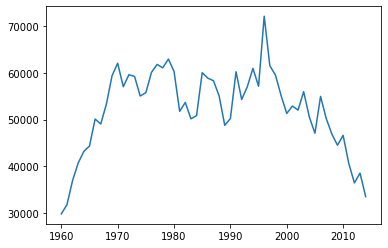

In [14]:
ts_dk.plot()

Now we create a time series for the corresponding Uruguaian time series.

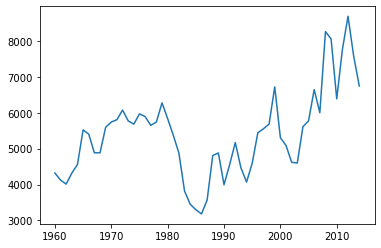

In [15]:
ts_ury = pd.Series(lines[1][4:-1], index=np.asarray(header_cols[4:-1], dtype=int))
ts_ury = pd.to_numeric(ts_ury)
ts_ury.plot()